In [109]:
# Dependencies
import json
import requests
from config import api_key
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from citipy import citipy
import random as random
import numpy as np
import gmaps
from config import gkey
import os


In [110]:

#Loading csv file
csv_file = "cities.csv"
#DataFrame
weather_data_df = pd.read_csv(csv_file)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
#query_url = f"{url}appid={api_key}&units={units}&q="


weather_data_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [121]:
print(requests.get(url))
print(requests.get(url).json())


<Response [401]>
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}


In [111]:
#configure gmaps
gmaps.configure(gkey)

locations = weather_data[['Lat', 'Lng']]
weights = weather_data['Humidity']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [131]:
# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

#List holdings
lat_lngs = []
lat_lngs_list = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#random generator
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Counts
count = 0
number = 1

#Loop
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        lat_lngs_list.append(lat_lng)
len(cities)

598

In [134]:
#Create dataframe with list of cities
df = pd.DataFrame(cities)
df = df.rename(columns={0: 'city'})
df['lat_lngs'] = lat_lngs_list
df


,city,lat_lngs
0,galway,"(53.289733831044174, -9.311839624708796)"
1,albany,"(-74.43744590341612, 98.97356139411761)"
2,ushuaia,"(-68.28685932296865, -29.736902245639243)"
3,tomatlan,"(19.79983304438929, -107.7874567497514)"
4,aklavik,"(70.34778728445926, -135.48018010881756)"
...,...,...
593,thinadhoo,"(0.55470313980463, 64.83666382595067)"
594,chumikan,"(55.64319041702228, 135.4647964638495)"
595,locri,"(36.66932951383603, 17.01726055103333)"
596,ridgecrest,"(36.69991125241974, -117.68495791867969)"


In [135]:
#Create more columns for df
df['temp'] = ""
df['max_temp'] = ""
df['humidity'] = ""
df['wind_speed'] = ""
df['cloudiness'] = ""

In [164]:

for index, row in df.iterrows():
    city = row['city']
    print(f"Processing City Records {index + 1} : {city}")
    
    target_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=" + city + "&APPID=" + api_key
    response = requests.get(target_url).json()
try:
        df.loc[index, 'temp'] = response['main']['temp']
        df.loc[index, 'max_temp'] = response['main']['temp_max']
        df.loc[index, 'humidity'] = response['main']['humidity']
        df.loc[index, 'wind_speed'] = response['wind']['speed']
        df.loc[index, 'cloudiness'] = response['clouds']['all']
except:
        print("City not found")
        pass
print("----------------------")
print("Complete")    

Processing City Records 1 : galway
Processing City Records 2 : albany
Processing City Records 3 : ushuaia
Processing City Records 4 : tomatlan
Processing City Records 5 : aklavik
Processing City Records 6 : castro
Processing City Records 7 : port alfred
Processing City Records 8 : tuktoyaktuk
Processing City Records 9 : nosy varika
Processing City Records 10 : san cristobal
Processing City Records 11 : kapaa
Processing City Records 12 : cape town
Processing City Records 13 : port hedland
Processing City Records 14 : port elizabeth
Processing City Records 15 : porto novo
Processing City Records 16 : tabiauea
Processing City Records 17 : havoysund
Processing City Records 18 : mataura
Processing City Records 19 : kiama
Processing City Records 20 : provideniya
Processing City Records 21 : el balyana
Processing City Records 22 : taolanaro
Processing City Records 23 : faanui
Processing City Records 24 : hilo
Processing City Records 25 : jamestown
Processing City Records 26 : punta arenas
Pro

Processing City Records 213 : santa isabel
Processing City Records 214 : rafaela
Processing City Records 215 : vanavara
Processing City Records 216 : port townsend
Processing City Records 217 : aksarka
Processing City Records 218 : ryotsu
Processing City Records 219 : seymchan
Processing City Records 220 : otane
Processing City Records 221 : beringovskiy
Processing City Records 222 : nyuksenitsa
Processing City Records 223 : harper
Processing City Records 224 : bambous virieux
Processing City Records 225 : garowe
Processing City Records 226 : zeya
Processing City Records 227 : carnarvon
Processing City Records 228 : kibaha
Processing City Records 229 : hirara
Processing City Records 230 : tasiilaq
Processing City Records 231 : yirol
Processing City Records 232 : usogorsk
Processing City Records 233 : sri aman
Processing City Records 234 : kumluca
Processing City Records 235 : suba
Processing City Records 236 : sierre
Processing City Records 237 : kodinsk
Processing City Records 238 : m

Processing City Records 423 : antigonish
Processing City Records 424 : kudahuvadhoo
Processing City Records 425 : kununurra
Processing City Records 426 : benjamin constant
Processing City Records 427 : haverfordwest
Processing City Records 428 : portland
Processing City Records 429 : port macquarie
Processing City Records 430 : ruidoso
Processing City Records 431 : kieta
Processing City Records 432 : chicama
Processing City Records 433 : bloomingdale
Processing City Records 434 : iisalmi
Processing City Records 435 : bowen
Processing City Records 436 : high level
Processing City Records 437 : jaora
Processing City Records 438 : shahr-e babak
Processing City Records 439 : tooele
Processing City Records 440 : iquique
Processing City Records 441 : cangzhou
Processing City Records 442 : barroualie
Processing City Records 443 : lavrentiya
Processing City Records 444 : garmisch-partenkirchen
Processing City Records 445 : lichuan
Processing City Records 446 : codrington
Processing City Record

In [161]:
df.head()

,city,lat_lngs,temp,max_temp,humidity,wind_speed,clouds,cloudiness
0,galway,"(53.289733831044174, -9.311839624708796)",,,,,,NaN
1,albany,"(-74.43744590341612, 98.97356139411761)",,,,,,NaN
2,ushuaia,"(-68.28685932296865, -29.736902245639243)",,,,,,NaN
3,tomatlan,"(19.79983304438929, -107.7874567497514)",,,,,,NaN
4,aklavik,"(70.34778728445926, -135.48018010881756)",,,,,,NaN


Text(0.5, 1.0, 'City Latitude vs. Max Temperature')

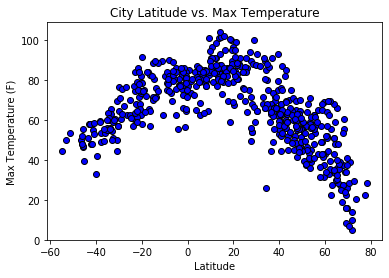

In [95]:
#Scatterplot Temperature (F) vs. Latitude
latitude = weather_data_df["Lat"]
max_temperature = weather_data_df["Max Temp"]
plt.scatter(latitude, max_temperature,facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")


In [ ]:
#The plot shows that the higher temperatures occurs the closer the latitude moves towards zero

Text(0.5, 1.0, 'Humidity % vs Latitude')

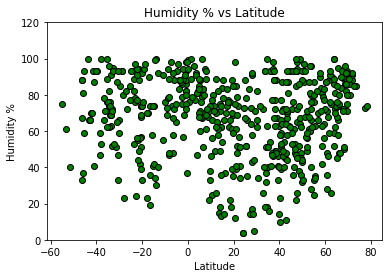

In [94]:
#Scatterplot Humidity (%) vs. Latitude
humidity = weather_data_df["Humidity"]
plt.scatter(latitude, humidity,facecolors="green", edgecolors="black")
plt.ylim(0,120)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Humidity % vs Latitude")

In [ ]:
#The plot shows that the lowest percentage of humidity occurs from 0-40 degrees latitude 

Text(0.5, 1.0, 'Cloudiness vs Latitude')

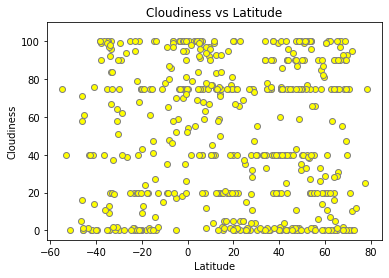

In [99]:
#Scatterplot Cloudiness (%) vs. Latitude
cloudiness = weather_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, facecolors="yellow", edgecolors="grey")
plt.ylim(-5, 110)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude")

In [ ]:
#The plot shows that cloud coverage is spread out throughout the latitudes, however tends to have less cloudiness the higher the latitude is.

Text(0.5, 1.0, 'Wind Speed vs Latitude')

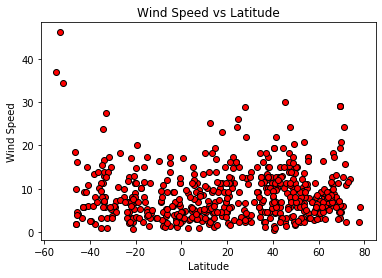

In [92]:
#Scatterplot Wind Speed (mph) vs. Latitude
wind_speed = weather_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed, facecolors="red", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude")

In [ ]:
#The plot shows that besides a few outliers, wind speed are evenly spread out across different latitudes of the world